<a href="https://colab.research.google.com/github/ValerieLangat/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Valerie_Langat_Unit_1_Sprint_2_Coding_Challange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [114]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan%,nan%,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,"1,250.00%","-6,996.67%",christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,"3,300.00%","6,600.00%",muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,"-1,250.00%","1,850.00%",christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,821.67%","-6,305.00%",christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [115]:
df_1 = (pd.merge(cell_phones, population, on=['time', 'geo'], how='inner'))
print(df_1)

      geo  time  cell_phones_total  population_total
0     afg  1960              0.00%           8996351
1     afg  1965              0.00%           9938414
2     afg  1970              0.00%          11126123
3     afg  1975              0.00%          12590286
4     afg  1976              0.00%          12840299
5     afg  1977              0.00%          13067538
6     afg  1978              0.00%          13237734
7     afg  1979              0.00%          13306695
8     afg  1980              0.00%          13248370
9     afg  1981              0.00%          13053954
10    afg  1982              0.00%          12749645
11    afg  1983              0.00%          12389269
12    afg  1984              0.00%          12047115
13    afg  1985              0.00%          11783050
14    afg  1986              0.00%          11601041
15    afg  1987              0.00%          11502761
16    afg  1988              0.00%          11540888
17    afg  1989              0.00%          11

In [116]:
df_1.shape

(8590, 4)

In [117]:
geo_country_codes.head()
columns = geo_country_codes[['geo', 'country']]
columns

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla
5,akr_a_dhe,Akrotiri and Dhekelia
6,ala,Åland
7,alb,Albania
8,and,Andorra
9,ant,Netherlands Antilles


In [118]:
df_2 = (pd.merge(df_1, columns, on='geo'))
df_2.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.00%,8996351,Afghanistan
1,afg,1965,0.00%,9938414,Afghanistan
2,afg,1970,0.00%,11126123,Afghanistan
3,afg,1975,0.00%,12590286,Afghanistan
4,afg,1976,0.00%,12840299,Afghanistan


In [119]:
df_2.shape

(8590, 5)

Calculate number of cell phones per person

In [120]:
df_2['Phones_Per_Person'] = df_2['cell_phones_total']/df_2['population_total']
df_2.tail()

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
8585,zwe,2013,"1,363,316,700.00%",15054506,Zimbabwe,90.56%
8586,zwe,2014,"1,179,865,200.00%",15411675,Zimbabwe,76.56%
8587,zwe,2015,"1,275,741,000.00%",15777451,Zimbabwe,80.86%
8588,zwe,2016,"1,287,892,600.00%",16150362,Zimbabwe,79.74%
8589,zwe,2017,"1,409,210,400.00%",16529904,Zimbabwe,85.25%


In [121]:
usa = df_2[df_2['country'] == 'United States']
usa[usa['time'].isin([2015, 2016, 2017])]

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
8132,usa,2015,"38,230,700,000.00%",319929162,United States,119.50%
8133,usa,2016,"39,588,100,000.00%",322179605,United States,122.88%
8134,usa,2017,"39,588,100,000.00%",324459463,United States,122.01%


In [122]:
df_2['country'].groupby(df_2['time']).describe()

,count,unique,top,freq
time,,,,
1960,184,184,Italy,1
1965,184,184,Italy,1
1970,184,184,Italy,1
1975,184,184,Italy,1
1976,184,184,Italy,1
1977,184,184,Italy,1
1978,184,184,Italy,1
1979,184,184,Italy,1
1980,184,184,Italy,1


In [123]:
df_2.describe()

,time,cell_phones_total,population_total,Phones_Per_Person
count,"859,000.00%","859,000.00%","859,000.00%","859,000.00%"
mean,"199,419.35%","900,494,964.29%","2,983,823,058.17%",27.96%
std,"1,425.80%","5,573,408,487.22%","11,612,837,747.48%",45.42%
min,"196,000.00%",0.00%,"443,300.00%",0.00%
25%,"198,300.00%",0.00%,"145,614,800.00%",0.00%
50%,"199,500.00%","620,000.00%","572,506,250.00%",0.16%
75%,"200,600.00%","169,765,200.00%","1,810,581,200.00%",46.11%
max,"201,700.00%","147,409,700,000.00%","140,951,739,700.00%",249.02%


In [124]:
df_2['country'].groupby(df_2['time']).describe()

,count,unique,top,freq
time,,,,
1960,184,184,Italy,1
1965,184,184,Italy,1
1970,184,184,Italy,1
1975,184,184,Italy,1
1976,184,184,Italy,1
1977,184,184,Italy,1
1978,184,184,Italy,1
1979,184,184,Italy,1
1980,184,184,Italy,1


In [0]:
df_2.dropna(inplace=True)

In [0]:
df_2['geo'].apply(lambda x: x.upper())

In [130]:
df_2.head()

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
0,afg,1960,0.00%,8996351,Afghanistan,0.00%
1,afg,1965,0.00%,9938414,Afghanistan,0.00%
2,afg,1970,0.00%,11126123,Afghanistan,0.00%
3,afg,1975,0.00%,12590286,Afghanistan,0.00%
4,afg,1976,0.00%,12840299,Afghanistan,0.00%


In [0]:
pd.options.display.float_format = '{:,}'.format

In [132]:
df_2.describe(include='all')

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
count,8590,"8,590.0","8,590.0","8,590.0",8590,"8,590.0"
unique,195,nan,nan,nan,195,nan
top,cyp,nan,nan,nan,Cyprus,nan
freq,46,nan,nan,nan,46,nan
mean,NaN,"1,994.1934807916182","9,004,949.642905472","29,838,230.581722934",NaN,0.2796385558059151
std,NaN,14.257974607310302,"55,734,084.872179635","116,128,377.47477299",NaN,0.454246656214052
min,NaN,"1,960.0",0.0,"4,433.0",NaN,0.0
25%,NaN,"1,983.0",0.0,"1,456,148.0",NaN,0.0
50%,NaN,"1,995.0","6,200.0","5,725,062.5",NaN,0.0015636266438163813
75%,NaN,"2,006.0","1,697,652.0","18,105,812.0",NaN,0.4611491855201403


In [133]:
usage_2017 = df_2[df_2['time'] == 2017]
usage_2017

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
45,afg,2017,"23,929,713.0",35530081,Afghanistan,0.6735057260353557
91,ago,2017,"13,323,952.0",29784193,Angola,0.4473497737541521
137,alb,2017,"3,497,950.0",2930187,Albania,1.19376340144844
183,and,2017,"80,337.0",76965,Andorra,1.0438121223932957
219,are,2017,"19,826,224.0",9400145,United Arab Emirates,2.109140231347495
265,arg,2017,"61,897,379.0",44271041,Argentina,1.3981460024850105
311,arm,2017,"3,488,524.0",2930450,Armenia,1.1904396935624222
396,aus,2017,"27,553,000.0",24450561,Australia,1.1268862092775704
442,aut,2017,"14,924,340.0",8735453,Austria,1.7084792282666967
488,aze,2017,"10,127,000.0",9827589,Azerbaijan,1.0304663737972761


In 2017, China, India, Indonesia, USA and Brazil had the most cell phones

In [0]:
usage_2017.sort_values('cell_phones_total', ascending=False).head(5)

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
1496,CHN,2017,"1,474,097,000.0",1409517397,China,1.0458168186766978
3595,IND,2017,"1,168,902,277.0",1339180127,India,0.8728491809526382
3549,IDN,2017,"458,923,202.0",263991379,Indonesia,1.738402230172827
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354
1084,BRA,2017,"236,488,548.0",209288278,Brazil,1.1299655683535224


2014 is when the United States first had more cell phones than people.

In [0]:
usa = df_2[df_2['country'] == "United States"]
usa[usa['time'].isin([2013, 2014, 2015, 2016])]

,geo,time,cell_phones_total,population_total,country,Phones_Per_Person
8130,USA,2013,"310,698,000.0",315536676,United States,0.9846652501340288
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,USA,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,USA,2016,"395,881,000.0",322179605,United States,1.228758722948959


In [0]:
df_2.describe(include=['object'])

,geo,country
count,8590,8590
unique,195,195
top,RWA,Cyprus
freq,46,46


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [135]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [136]:
Per_Year = df['Occupation'].groupby(df['Year']).describe()
Per_Year

,count,unique,top,freq
Year,,,,
1999,166,4,"Acting, Comedy & Music",150
2000,169,4,"Acting, Comedy & Music",125
2001,157,4,"Acting, Comedy & Music",114
2002,159,4,"Acting, Comedy & Music",99
2003,166,4,"Acting, Comedy & Music",93
2004,164,4,"Acting, Comedy & Music",63
2005,162,4,"Acting, Comedy & Music",60
2006,161,4,"Acting, Comedy & Music",58
2007,141,4,Media,47


In [0]:
pd.options.display.float_format = '{:,.2%}'.format

In [138]:
Per_Year['Breakdown'] = Per_Year['freq']/Per_Year['count']
Per_Year

,count,unique,top,freq,Breakdown
Year,,,,,
1999,166,4,"Acting, Comedy & Music",150,90.36%
2000,169,4,"Acting, Comedy & Music",125,73.96%
2001,157,4,"Acting, Comedy & Music",114,72.61%
2002,159,4,"Acting, Comedy & Music",99,62.26%
2003,166,4,"Acting, Comedy & Music",93,56.02%
2004,164,4,"Acting, Comedy & Music",63,38.41%
2005,162,4,"Acting, Comedy & Music",60,37.04%
2006,161,4,"Acting, Comedy & Music",58,36.02%
2007,141,4,Media,47,33.33%


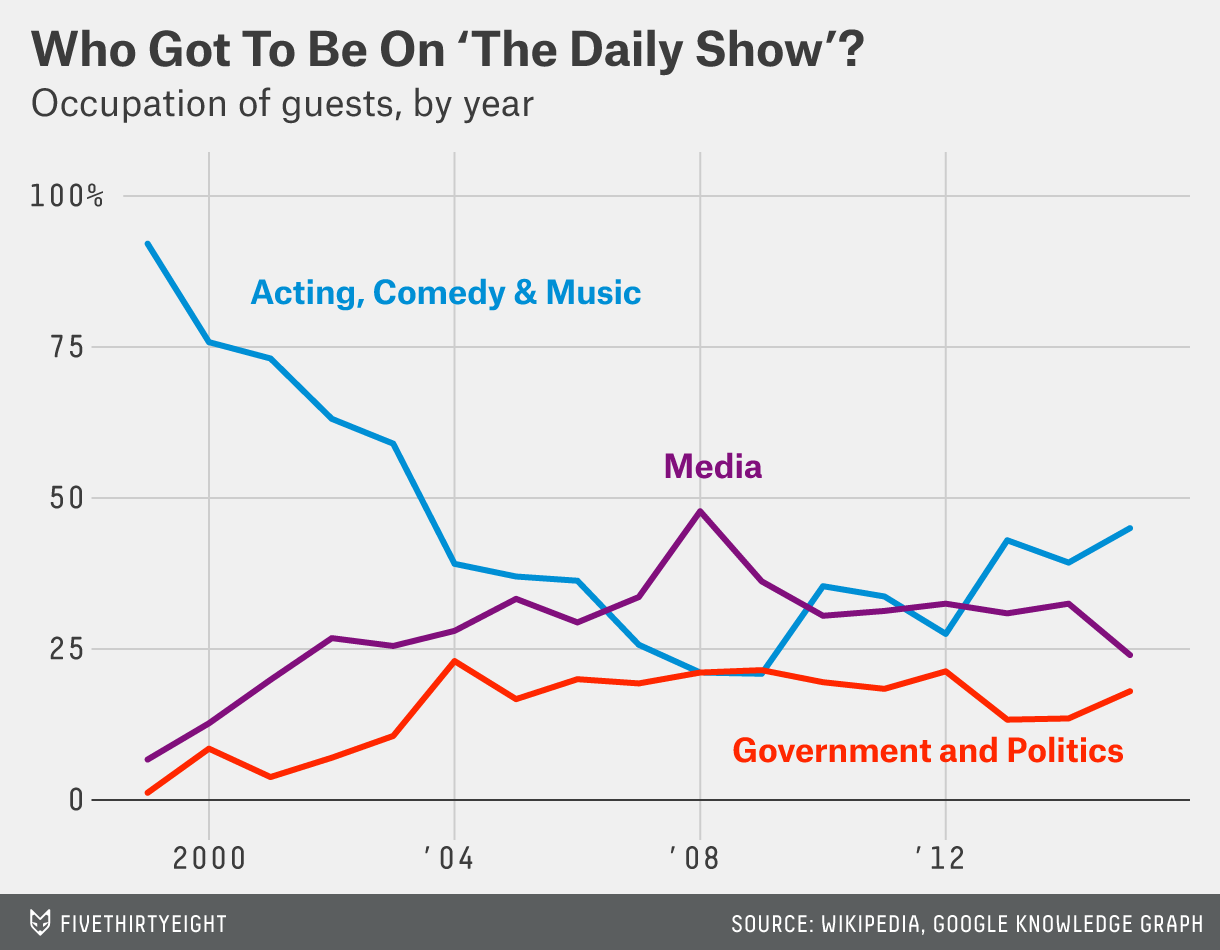

In [148]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [0]:
import seaborn as sns

Text(0, 0.5, 'Frequency')

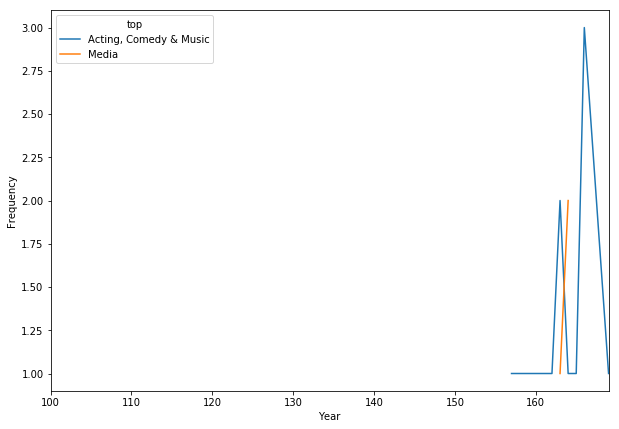

In [147]:

fig, ax = plt.subplots(figsize=(10,7))
Per_Year.groupby(['count','top']).count()['freq'].unstack().plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')